In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X=iris['data'][:,(2,3)]
y=iris['target'] == 2

In [3]:
from sklearn.svm import LinearSVC


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([
    ('std_scaler' , StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([ True])

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
moons = make_moons()

In [8]:
type(moons)

tuple

In [9]:
from pprint import pprint

In [10]:
pprint(make_moons.__doc__)

('Make two interleaving half circles\n'
 '\n'
 '    A simple toy dataset to visualize clustering and classification\n'
 '    algorithms. Read more in the :ref:`User Guide <sample_generators>`.\n'
 '\n'
 '    Parameters\n'
 '    ----------\n'
 '    n_samples : int, optional (default=100)\n'
 '        The total number of points generated.\n'
 '\n'
 '    shuffle : bool, optional (default=True)\n'
 '        Whether to shuffle the samples.\n'
 '\n'
 '    noise : double or None (default=None)\n'
 '        Standard deviation of Gaussian noise added to the data.\n'
 '\n'
 '    random_state : int, RandomState instance or None, optional '
 '(default=None)\n'
 '        If int, random_state is the seed used by the random number '
 'generator;\n'
 '        If RandomState instance, random_state is the random number '
 'generator;\n'
 '        If None, the random number generator is the RandomState instance '
 'used\n'
 '        by `np.random`.\n'
 '\n'
 '    Returns\n'
 '    -------\n'
 '    X : arr

In [11]:
X,y=make_moons()


In [12]:
poly_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('std_scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [13]:
poly_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [14]:
dir(poly_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_inverse_transform',
 '_pairwise',
 '_replace_estimator',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'memory',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'steps',
 'transform']

In [15]:
import numpy as np
x0s = np.linspace(-1.5,2.5)
x1s=np.linspace(-1,1.5)

In [16]:
x0,x1 = np.meshgrid(x0s,x1s)

In [17]:
X = np.c_[x0.ravel(), x1.ravel()]

In [18]:
X

array([[-1.5       , -1.        ],
       [-1.41836735, -1.        ],
       [-1.33673469, -1.        ],
       ...,
       [ 2.33673469,  1.5       ],
       [ 2.41836735,  1.5       ],
       [ 2.5       ,  1.5       ]])

In [19]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [20]:
X,y=make_moons()

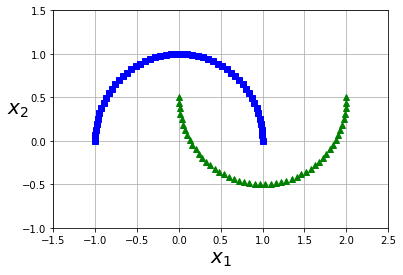

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

In [22]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
#     plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [23]:
poly_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

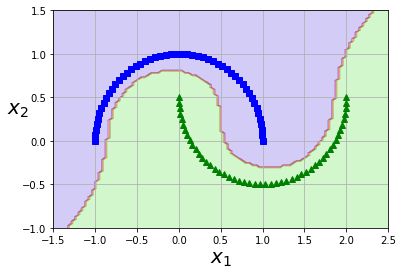

In [24]:
plot_predictions(poly_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [25]:
X,y=make_moons(n_samples=100,noise=0.2)

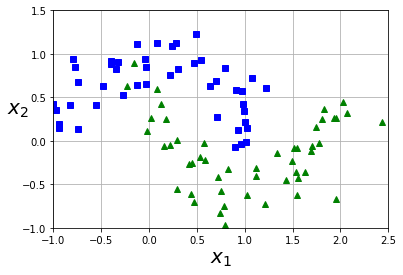

In [26]:
plot_dataset(X,y,[-1,2.5,-1,1.5])

In [27]:
from sklearn.svm import SVC
poly_kernel_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc_clf',SVC(kernel='poly',degree=3, coef0=1, C=5))
])
poly_kernel_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

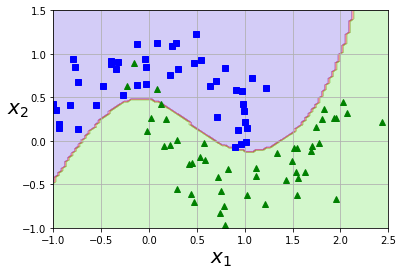

In [28]:
plot_predictions(poly_kernel_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])

In [29]:
from sklearn.svm import SVC
poly_kernel_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc_clf',SVC(kernel='poly',degree=20, coef0=1, C=5))
])
poly_kernel_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=20, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

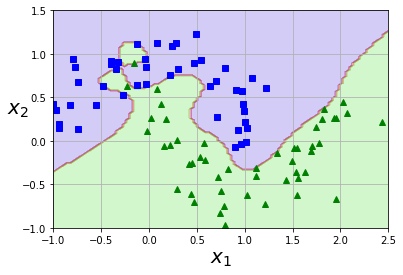

In [30]:
plot_predictions(poly_kernel_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])

In [31]:
rbf_kernel_svc_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel='rbf', C=0.0001, gamma=5))
])
rbf_kernel_svc_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbf_kernel', SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

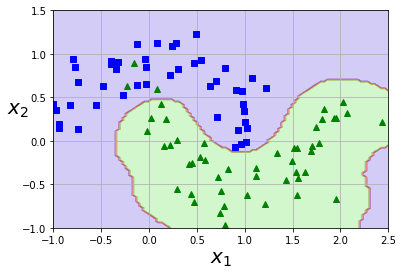

In [32]:
plot_predictions(rbf_kernel_svc_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])

In [33]:
rbf_kernel_svc_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel='rbf', C=10, gamma=5))
])
rbf_kernel_svc_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbf_kernel', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

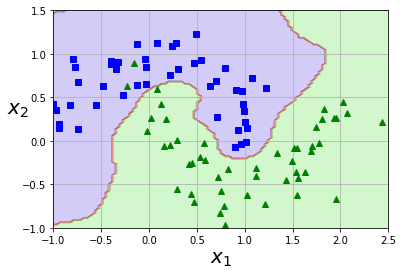

In [34]:
plot_predictions(rbf_kernel_svc_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])

In [35]:
rbf_kernel_svc_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel='rbf', C=100, gamma=5))
])
rbf_kernel_svc_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbf_kernel', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

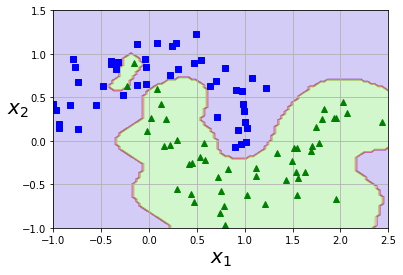

In [36]:
plot_predictions(rbf_kernel_svc_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])

Text(0.5,1,'$\\gamma = 5, C = 100$')

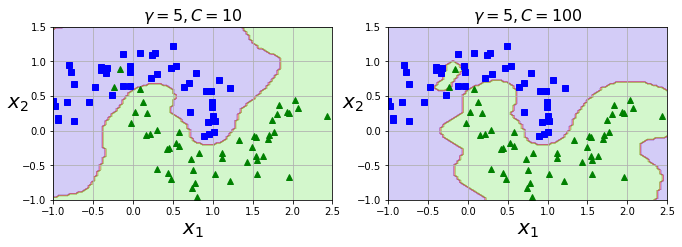

In [38]:
plt.figure(figsize=(11, 7))
plt.subplot(221)
rbf_kernel_svc_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel='rbf', C=10, gamma=5))
])
rbf_kernel_svc_clf.fit(X,y)
plot_predictions(rbf_kernel_svc_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])
plt.title(r"$\gamma = {}, C = {}$".format(5, 10), fontsize=16)


plt.subplot(222)
rbf_kernel_svc_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel='rbf', C=100, gamma=5))
])
rbf_kernel_svc_clf.fit(X,y)
plot_predictions(rbf_kernel_svc_clf,[-1,2.5,-1,1.5])
plot_dataset(X,y, [-1,2.5,-1,1.5])
plt.title(r"$\gamma = {}, C = {}$".format(5, 100), fontsize=16)

In [39]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [44]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [49]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(X, y, 'bo')
    plt.show()

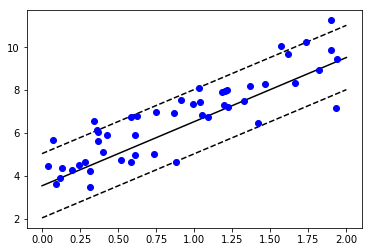

In [50]:
plot_svm_regression(svm_reg, X, y, [0,2])

In [51]:
def find_margin_violating_points(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    distance = np.abs(y_pred - y)
    off_margin = distance >= svm_reg.epsilon
    return np.argwhere(off_margin)

In [81]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    margin_violating_points = find_margin_violating_points(svm_reg, X, y)
    plt.plot(X, y, 'bo')
    plt.scatter(X[margin_violating_points], y[margin_violating_points],s=270, facecolors='orange')
#     plt.show()

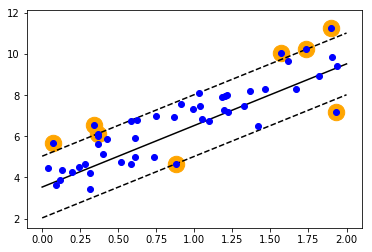

In [72]:
plot_svm_regression(svm_reg, X, y, [0,2])

In [73]:
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=0.5)
svm_reg1.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

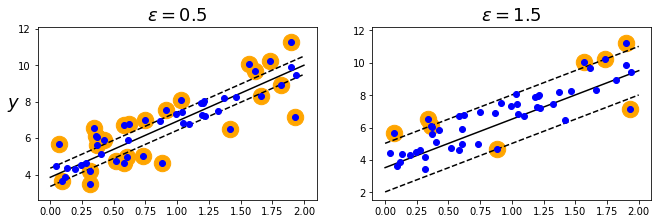

In [82]:
plt.figure(figsize=(11,7))
plt.subplot(221)
plot_svm_regression(svm_reg1, X, y, [0,2])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.subplot(222)
plt.title(r"$\epsilon = {}$".format(svm_reg.epsilon), fontsize=18)

plot_svm_regression(svm_reg, X, y, [0,2])

In [83]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [92]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.2)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5,1,'$\\epsilon = 0.2,  C = 10$')

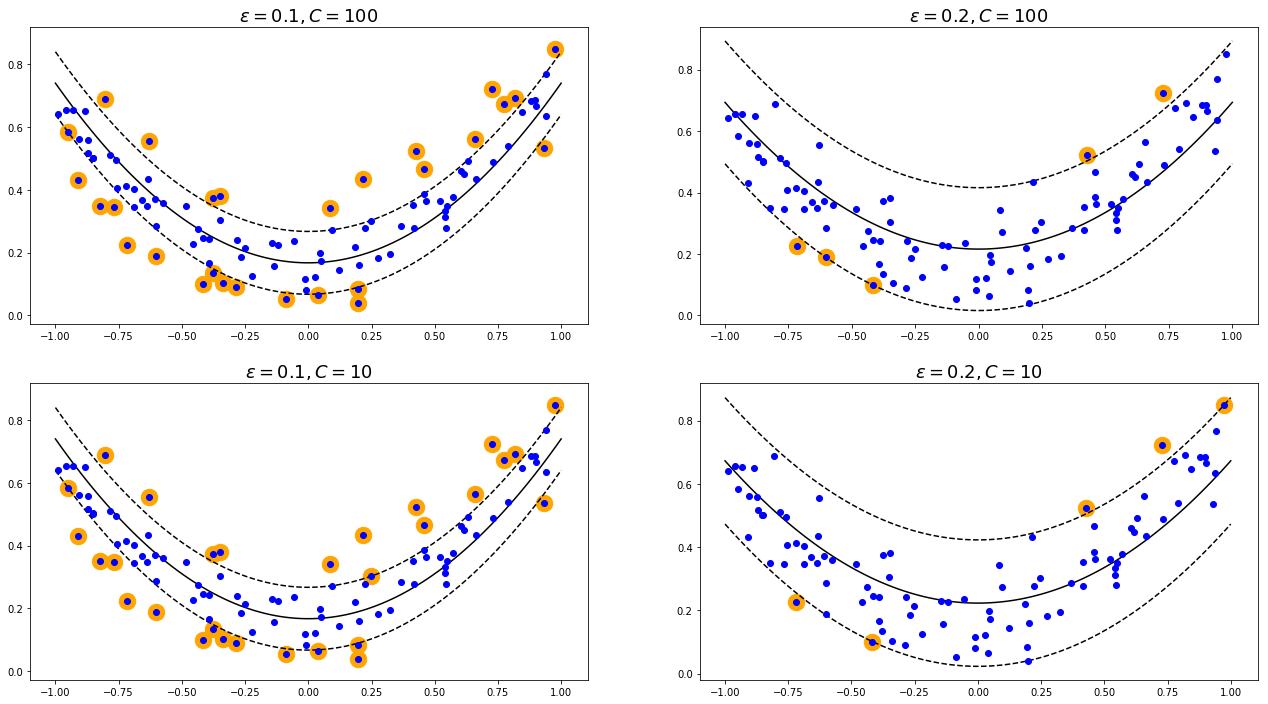

In [103]:



plt.figure(figsize=(22,12))
plt.subplot(221)
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)
plot_svm_regression(svm_poly_reg, X, y,[-1, 1])
plt.title(r"$\epsilon = {}, C = {}$".format(svm_poly_reg.epsilon, 100), fontsize=18)

plt.subplot(222)
svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.2)
svm_poly_reg1.fit(X,y)
plot_svm_regression(svm_poly_reg1, X, y,[-1, 1])
plt.title(r"$\epsilon = {},  C = {}$".format(svm_poly_reg1.epsilon, 100), fontsize=18)



plt.subplot(223)
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=10, epsilon=0.1)
svm_poly_reg2.fit(X,y)
plot_svm_regression(svm_poly_reg2, X, y,[-1, 1])
plt.title(r"$\epsilon = {},  C = {}$".format(svm_poly_reg2.epsilon, 10), fontsize=18)



plt.subplot(224)
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=10, epsilon=0.2)
svm_poly_reg2.fit(X,y)
plot_svm_regression(svm_poly_reg2, X, y,[-1, 1])
plt.title(r"$\epsilon = {},  C = {}$".format(svm_poly_reg2.epsilon, 10), fontsize=18)


## **__Exercise__ ** :-

In [165]:
iris = load_iris()
X=iris['data'] [:, (2,3)]
y=iris['target'] == 2

In [166]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

lin_svc = LinearSVC()
sgd_clf = SGDClassifier()
svc_clf = SVC()


In [167]:
X_train , X_test, y_train, y_test = train_test_split(X,y)

In [168]:
lin_svc.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
lin_pred = lin_svc.predict(X_test)
sgd_pred = sgd_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score
lin_accuracy = accuracy_score( y_test, lin_pred )
sgd_accuracy = accuracy_score( y_test, sgd_pred )
svc_accuracy = accuracy_score( y_test, svc_pred )

In [171]:
lin_accuracy, sgd_accuracy, svc_accuracy

(0.9210526315789473, 0.631578947368421, 0.9473684210526315)

In [220]:
lin_svc = LinearSVC()
sgd_clf = SGDClassifier(loss="hinge", alpha=1/(len(X_train)))
svc_clf = SVC(kernel='linear', C=1)


In [221]:
lin_svc.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [222]:
lin_pred = lin_svc.predict(X_test)
sgd_pred = sgd_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)

In [223]:
lin_accuracy = accuracy_score( y_test, lin_pred )
sgd_accuracy = accuracy_score( y_test, sgd_pred )
svc_accuracy = accuracy_score( y_test, svc_pred )

In [224]:
lin_accuracy, sgd_accuracy, svc_accuracy

(0.9210526315789473, 0.9736842105263158, 0.9473684210526315)

In [225]:
lin_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [226]:
sgd_clf

SGDClassifier(alpha=0.008928571428571428, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [227]:
svc_clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [228]:
lin_pred = lin_svc.predict(X_train)
sgd_pred = sgd_clf.predict(X_train)
svc_pred = svc_clf.predict(X_train)

In [229]:
lin_accuracy = accuracy_score( y_train, lin_pred )
sgd_accuracy = accuracy_score( y_train, sgd_pred )
svc_accuracy = accuracy_score( y_train, svc_pred )

In [230]:
lin_accuracy, sgd_accuracy, svc_accuracy

(0.9732142857142857, 0.9553571428571429, 0.9732142857142857)

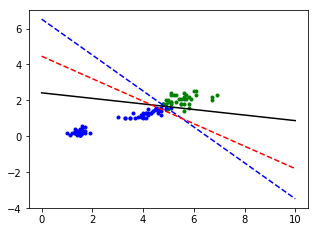

In [268]:
plt.figure(figsize=(11,8))
plt.subplot(221)
y0 =(y_train ==False)
y1=(y_train==True)
plt.plot(X_train[y0,0], X_train[y0,1], 'b.')
plt.plot(X_train[y1,0], X_train[y1,1], 'g.')


w1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
b1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
w2 = -svc_clf.coef_[0, 0]/svc_clf.coef_[0, 1]
b2 = -svc_clf.intercept_[0]/svc_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = np.array([[0, 0 * w1 + b1], [10, 10 * w1 + b1]])
line2 = np.array([[0, 0 * w2 + b2], [10, 10 * w2 + b2]])
line3 = np.array([[0, 0 * w3 + b3], [10, 10 * w3 + b3]])

plt.plot(line1[:,0], line1[:,1], 'k-')
plt.plot(line2[:,0], line2[:,1], 'b--')
plt.plot(line3[:,0], line3[:,1], 'r--')


In [269]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [270]:
X=mnist['data']
y=mnist['target']

In [272]:
X_train, X_test, y_train, y_test= train_test_split(X,y)
lin_clf= LinearSVC()
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [273]:
y_pred = lin_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8722857142857143

In [274]:
from sklearn.svm import SVC

In [276]:
svc_predictor = Pipeline([
    ('scaler', StandardScaler()),
    ('lin_svc', LinearSVC())
])

In [277]:
svc_predictor.fit(X_train, y_train)
y_pred = svc_predictor.predict(X_test)
accuracy_score(y_test,y_pred)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9070285714285714

In [279]:
svc_pipeline = Pipeline([
    ('std_scaler' , StandardScaler()),
    ('svc_ovr_clf', SVC(decision_function_shape='ovr',gamma='auto'))
])
svc_pipeline.fit(X_train[:10000], y_train[:10000])
y_pred=svc_pipeline.predict(X_train)
accuracy_score(y_train, y_pred)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.946952380952381

In [280]:
y_pred = svc_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9410285714285714

In [281]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

In [293]:
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

In [294]:
svc_clf = SVC()
rnd_search = RandomizedSearchCV(svc_clf, param_distributions, verbose=2, n_jobs=-1, cv=2)
rnd_search_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rnd_search', rnd_search)
])
rnd_search_pipeline.fit(X_train[:10000], y_train[:10000])

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] C=4.683886671954946, gamma=0.041722284917924596 .................
[CV] C=4.683886671954946, gamma=0.041722284917924596 .................
[CV] C=2.500606003695708, gamma=0.005052024450184008 .................
[CV] C=2.500606003695708, gamma=0.005052024450184008 .................
[CV] .. C=2.500606003695708, gamma=0.005052024450184008, total= 1.4min
[CV] C=3.553391738180286, gamma=0.0018199040391887068 ................
[CV] .. C=2.500606003695708, gamma=0.005052024450184008, total= 1.5min
[CV] C=3.553391738180286, gamma=0.0018199040391887068 ................
[CV] .. C=4.683886671954946, gamma=0.041722284917924596, total= 2.0min
[CV] C=10.69166178252155, gamma=0.0073847982563016315 ................
[CV] .. C=4.683886671954946, gamma=0.041722284917924596, total= 2.0min
[CV] C=10.69166178252155, gamma=0.0073847982563016315 ................
[CV] . C=3.553391738180286, gamma=0.0018199040391887068, total=  44.5s
[CV] C=1.2180723

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.5min finished


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rnd_search', RandomizedSearchCV(cv=2, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter...obs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2))])

In [297]:
y_pred = rnd_search_pipeline.predict(X_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [298]:
accuracy_score(y_train, y_pred)

0.9569904761904762

In [299]:
ls

SVM.ipynb


In [301]:
ls ../Housing/

Housing.ipynb  housing.csv


In [303]:
import pandas as pd
housing_df = pd.read_csv('../Housing/housing.csv')

In [304]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [305]:
from sklearn.svm import SVR

In [306]:
from sklearn.datasets import fetch_california_housing

In [307]:
housing = fetch_california_housing()

In [308]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [309]:
X=housing['data']
y=housing['target']

In [312]:
len(X)

20640

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
lin_svr = LinearSVR()
lin_svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [314]:
from sklearn.metrics import mean_squared_error
y_preds = lin_svr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [316]:
mse

1.3540941636794372

In [320]:
svr_reg = SVR()

In [321]:
params_distributions = {'gamma' : reciprocal(0.001, 0.1), 'C': uniform(1,10)}

In [322]:
rnd_serach_housing = RandomizedSearchCV(svr_reg, param_distributions, n_jobs=-1, verbose=2, cv=3)

In [323]:

rnd_pipeline_housing = Pipeline([
    ('std_scaler', StandardScaler()),
    ('random_svr_seracher' , rnd_serach_housing)
])

In [324]:
rnd_pipeline_housing.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=6.955562095043075, gamma=0.023008784097070717 .................
[CV] C=6.955562095043075, gamma=0.023008784097070717 .................
[CV] C=6.955562095043075, gamma=0.023008784097070717 .................
[CV] C=1.2173804623800468, gamma=0.09170988088435472 .................
[CV] .. C=1.2173804623800468, gamma=0.09170988088435472, total=   9.3s
[CV] C=1.2173804623800468, gamma=0.09170988088435472 .................
[CV] .. C=6.955562095043075, gamma=0.023008784097070717, total=  10.4s
[CV] C=1.2173804623800468, gamma=0.09170988088435472 .................
[CV] .. C=6.955562095043075, gamma=0.023008784097070717, total=  10.4s
[CV] C=1.4074932113605823, gamma=0.09126683033449746 .................
[CV] .. C=6.955562095043075, gamma=0.023008784097070717, total=  10.5s
[CV] C=1.4074932113605823, gamma=0.09126683033449746 .................
[CV] .. C=1.2173804623800468, gamma=0.09170988088435472, total=   8.7s
[CV] C=1.4074932

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('random_svr_seracher', RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001...obs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2))])

In [325]:
y_preds = rnd_pipeline_housing.predict(X_test)
mse= mean_squared_error(y_test, y_preds)

In [329]:
mse

0.34215603637620395

In [330]:
np.sqrt(mse)

0.5849410537620042

In [337]:
y_preds = rnd_pipeline_housing.predict(X_train)
mse= mean_squared_error(y_train, y_preds)

In [338]:
mse

0.35071326421253146

In [339]:
np.sqrt(mse)

0.592210489785964